In [ ]:
from pint import UnitRegistry
import numpy as np
import matplotlib.pyplot as plt
from open_atmos_jupyter_utils import show_plot


# Lab02 - Joanna Wójcicka

# Equation Interpretation
## Diffusion-Advection Equation for a Point Source

The given equation describes the **diffusion-advection equation** for a point source in one-dimensional space. This type of equation is commonly used in **transport phenomena**, such as **pollutant dispersion, heat transfer, and biological diffusion**.

## Breakdown of the Equation

$$ c(x,t) = \frac{M}{A} \frac{1}{2\sqrt{\pi D} t^{3/2}} x \exp\left[-\frac{(ut - x)^2}{4Dt}\right] $$

#### Where:
-  c(x,t)  → **Concentration** at position \( x \) and time \( t \).
-  M  → **Total mass** of the substance (**kg**).
-  A  → **Volumetric flow rate** (**m³/s**). Funnily, it is not an area.
-  D  → **Diffusion coefficient** (**m²/s**).
-  u  → **Velocity of advection** (**m/s**).
-  t  → **Time** (**s**).
-  x  → **Position** (**m**).
-  $\pi$  → **Mathematical constant** (~3.14159).
-  $\exp$  → **Exponential function**.

## Diffusion vs. Advection

**Diffusion** is the random movement of particles from regions of high concentration to low concentration, driven by Brownian motion. This process is governed by Fick’s Laws of Diffusion and depends on:
- The diffusion coefficient $D$, which determines how quickly particles spread.
- The concentration gradient, which drives the movement.
A pure diffusion process results in a Gaussian distribution of the substance over time.

**Advection** refers to the direct transport of particles by the bulk movement of a fluid. Unlike diffusion, which is random, advection moves substances in a specific direction, with velocity $u$ influencing the rate of transport. For example a river carrying pollutants downstream is an advective process.

## Applications of Diffusion-Advection

The diffusion-advection model applies in various real-world scenarios across different fields.

In **environmental science**, it plays a crucial role in understanding pollutant dispersion in air and water, helping researchers analyze how chemicals or contaminants spread in rivers and the atmosphere. Another important application is oil spill modeling, where scientists predict how an oil spill spreads on the ocean surface, aiding in response and cleanup efforts.

In **engineering and material science**, the model is widely used in heat transfer in moving fluids, particularly in thermal management systems, where heat spreads within a flowing liquid or gas. Additionally, it is essential in combustion processes, where the diffusion of fuel molecules and their transport by airflow determine combustion efficiency and stability.

In **biology and medicine**, diffusion-advection is fundamental in oxygen transport in blood, where oxygen molecules diffuse and are simultaneously carried by the bloodstream, ensuring proper oxygenation of tissues. Similarly, it plays a key role in drug delivery in tissues, as pharmaceuticals must diffuse through biological membranes while being transported by body fluids to reach their target sites efficiently.

# Equation model

In [6]:
# Initialize a Unit Registry
si = UnitRegistry()

# Define our function for C(x, t)
def concentration(x, t):
    """
    Args:
        x: Position array [length]
        t: Time array [time]
        M: Total substance amount [moles]
        A: Volumetric flow rate [length^3/time]
        D: Diffusion coefficient [length^2/time]
        U: Velocity [length/time]

    Returns:
        Concentration array [moles/length^3]
    """
    X, T = np.meshgrid(x.magnitude, t.magnitude)
    X = X * x.units
    T = T * t.units

    M  = 10.0  * si.kg               # mass
    A  = 2.0   * si.m**3 / si.s             # volumetric flow rate
    D  = 1.0  * si.m**2 / si.s    # diffusion coefficient
    u = 1e-3  * si.m / si.s       # velocity

    return (
        M
        / (A * 2 * np.sqrt(np.pi * D))
        * X
        / T**1.5
        * np.exp(-((u * T - X) ** 2) / (4 * D * T))
    )

# Plotting the concentration

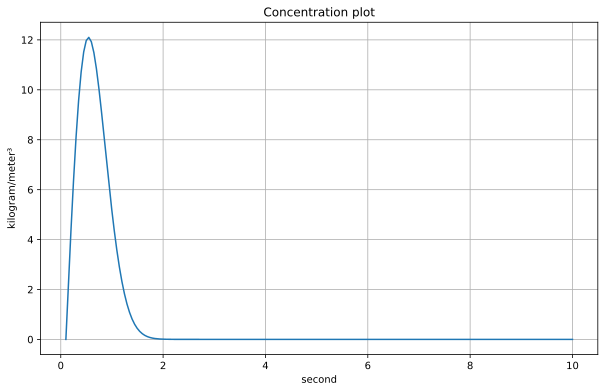

In [7]:
si.setup_matplotlib()

x = np.linspace(0, 10, 200) * si.m
t = np.linspace(0.1, 10, 200) * si.s

c = concentration(x, t)

fig = plt.figure(figsize=(10, 6))
plt.gca().plot(t, c[0])
plt.grid()
plt.title("Concentration plot")
show_plot(fig=fig)